<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-2 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> MLP for Binary Classification </h2> </html>

In this lab, you will use the Ionosphere data binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more in the links below.


[Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)

[Ionosphere Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)


Your task for this is lab is to develop a Keras-based Multi-Layer Perceptron model for this data set. Remember the number of output layers is equal to the number of classes.

Following we have provided some piece of code to you while you need to complete the rest of the code on your own.



<html> <h3 style="font-style:bold; color:blue;"> Here and in future practice sessions, if you see the following expression  </h3> </html>

#Your code to ......

#....

#....

<html> <h3 style="font-style:bold; color:blue;"> 
    you must write your code to solve the problem in this cell. 
    
Usually, the requirement will have a link where you can find information and examples of the solution, or you must take similar code from previous weeks' Jupyter Notebooks.  

As usual, you can compare your result with the result in the next (control) cell.
</h3> </html>


In [1]:
# Importing Libraries

# Your code to import read_csv class from pandas
from pandas import read_csv

# Your code to import train_test_split class from sklearn. 
#Follow link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Read the dataset from the path below. Store the data in a pandas dataframe named 'df'


Link to API - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html 

In [2]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'

# Your code to read the csv from the above path.

df = read_csv(path, header=None)

See the sample dataset. Print few rows of the dataset. Use dataframe.head() method.

Link to API:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [3]:
# Your code to print the first few rows of the dataset:

df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Print the basic info of the dataset. Use dataframe.info() from pandas library


In [4]:
# Your code to print information about the dataframe:

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22      351 n

Print the shape of the dataframe. Select suitable API call from the pandas library

In [5]:
# Your code to print the shape of the dataset:

df.shape

(351, 35)

### Separate the input and output from the dataframe. Input is all columns besides last column. Output is the last column.


In [6]:
# Input

X = df.values[:, :-1]
X.shape

(351, 34)

In [7]:
# Your code to get y - Hint y = df.values[:, some parameters]:

y = df.values[:, -1]

# Your code to print 'y' shape:

y.shape

(351,)

In [8]:
# Convert everthing in X to 'float' 


X = X.astype('float32')

# Convert the letters in column y to the numbers :

y = LabelEncoder().fit_transform(y)



In [9]:
# Print X type

type(X)

numpy.ndarray

In [10]:
#LabelEncoder?
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, 
# *i.e.* `y`, and not the input `X`.


In [11]:
#LabelEncoder.fit_transform?

In [12]:
# Print the genral information of the X and y 

# Your code to print X
print(X)

# Your code to print y
print(y)

# your code to print shape of X. Remember X is a numpy array
print(X.shape)

# your code to print shape of y. Remember y is a numpy array
print(y.shape)


[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

#### Separate X and y into training and test set with a ratio of your choice. 

Use sklearn train_test_split class.

Have a look at:  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [13]:
#train_test_split?

In [14]:
# Your code to separate the data into trauning and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
# Print the shapes of the resulting arrays:

# Your code to print shape of X_train
# Your code to print shape of X_test
# Your code to print shape of y_train
# Your code to print shape of X_test

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




(235, 34) (116, 34) (235,) (116,)


In [16]:
# Get the number of features from X_train. Remember the number of features is the number of inputs

n_features = X_train.shape[1]
n_features


34

In [17]:
y_train

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [18]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

<html> <h2 style="font-style:bold; color:blue;"> Creating a Multi-layer Perceptron using Keras </h2> </html>

We have added the first and last layers. Create the hidden layers of your choice.

You can choose any number of hidden layers and activation functions of your chose

https://keras.io/api/layers/core_layers/dense/


In [19]:
# define model

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))


# Add as many layers with activation functions of your choice


model.add(Dense(8, activation='relu'))



model.add(Dense(1, activation='sigmoid'))

c:\Users\Nisala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Print your MLP model

print(model.summary())

# (You will receive your model, which couldn't be the same as the result below)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 447 (1.75 KB)

 Trainable params: 447 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

None


<html> <h3 style="font-style:italic; color:blue;"> MLP training </h3> </html>

In the next cell, we trained the above neural network model and tested its accuracy. As this concept has still not benn covered in the class, just run the code to check the accuracy.


In [21]:
# Compile the model

# Training method: optimizer - "adam"
# adam (Adaptive Moment Estimation) Optimizer is one of the most common optimizers
# Measure of error in the Backpropagation algorithm: 'binary_crossentropy'
# The metric by which we will perform optimization is 'accuracy'

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# fit the model

# mini-sample size batch_size = 32, we analyze at each step 32 rows,
# We determine the direction of the gradient from them and, in accordance with this
# determine the size of the weights
# the number of epochs = 150 - those how many times we carry out training 
# verbose = 1 - printing information in the learning process

history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6426 - loss: 0.6756  
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6681 - loss: 0.6431 
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.6212 
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7106 - loss: 0.6019 
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7149 - loss: 0.5841 
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.5689 
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 0.5555 
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7745 - loss: 0.5430 
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.5300 
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8043 - loss: 0.5176 
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.5073 
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8383 - lo

In [23]:
# evaluate the model

loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9483 - loss: 0.2345 
Test Accuracy: 0.948


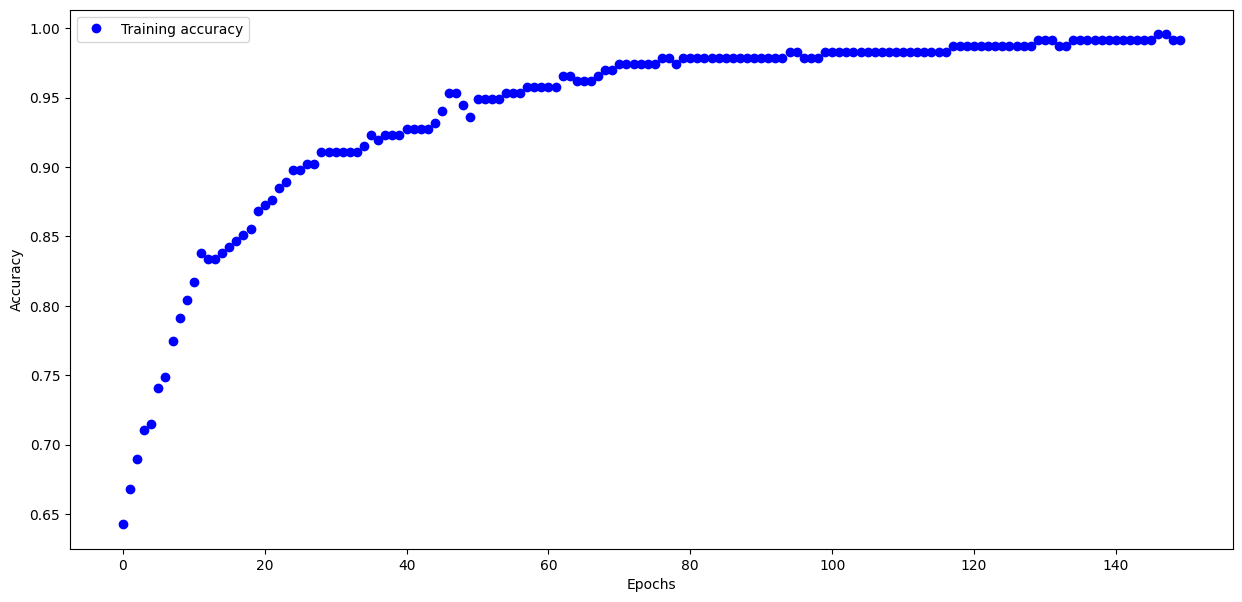

In [24]:
# Accuracy graphs during training

import matplotlib.pyplot as plt

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

** How much accuracy have you got? Compare the accuracy with your peers. **

** Now, change your model and activation function to get the better accuracy as compared to your peers **



In [25]:
#Dense?

In [26]:
# define the NEW model

model = Sequential()
model.add(Dense(34, activation='gelu', input_shape=(n_features,)))


#
# Add as many layers with activation functions of your choice
#
model.add(Dense(50, activation='gelu'))
model.add(Dense(10, activation='gelu'))


model.add(Dense(1, activation='sigmoid'))

In [27]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 34)             │         1,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         1,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,461 (13.52 KB)

 Trainable params: 3,461 (13.52 KB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history2 = model.fit(X_train, y_train, epochs=150, batch_size=64, verbose=1)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5362 - loss: 0.7043  
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6511 - loss: 0.6801 
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6255 - loss: 0.6618 
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6638 - loss: 0.6466 
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6936 - loss: 0.6323 
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7064 - loss: 0.6177 
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7064 - loss: 0.6030 
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7106 - loss: 0.5866 
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7149 - loss: 0.5719 
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7234 - loss: 0.5540 
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7319 - loss: 0.5356 
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7617 - lo

In [30]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9310 - loss: 0.5865      
Test Accuracy: 0.931


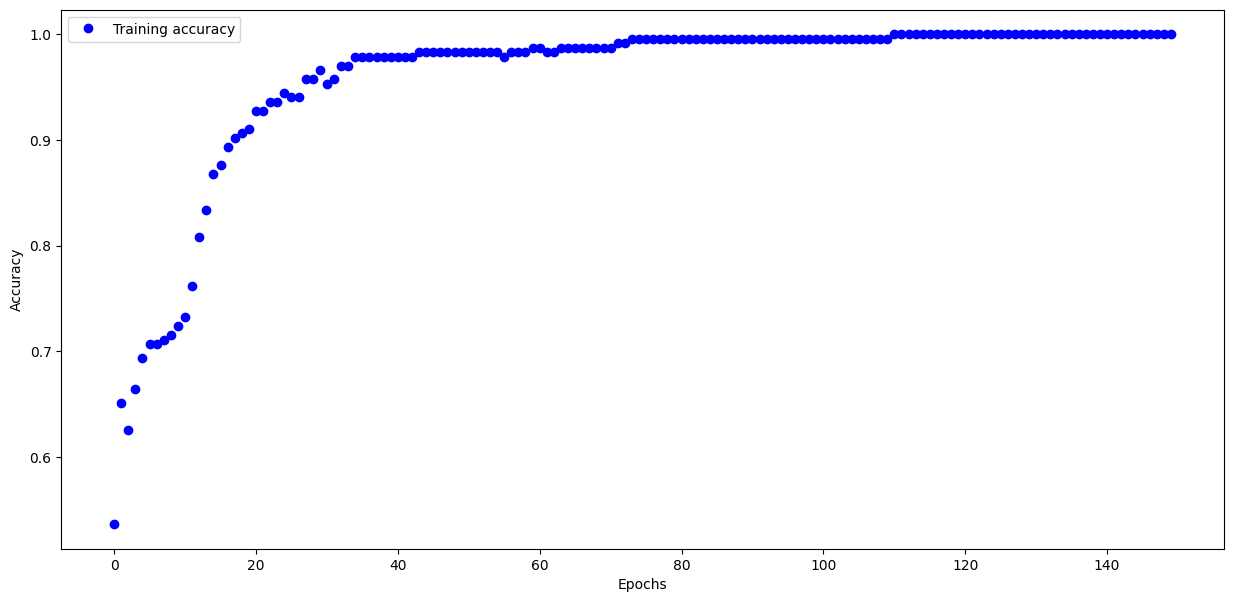

In [31]:
# Accuracy graphs during training

import matplotlib.pyplot as plt

history_dict = history2.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## One more model

In [32]:
# More info regarding 
# tensorflow.keras.initializers.he_normal()

#  https://keras.io/api/layers/initializers/
#  https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal

In [33]:
model_2 = Sequential()
model_2.add(Dense(17, activation='relu', input_shape=(n_features,), kernel_initializer="he_normal"))
model_2.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model_2.add(Dense(8, activation='relu', kernel_initializer="he_normal"))
model_2.add(Dense(1, activation='sigmoid'))

In [34]:
print(model_2.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 17)             │           595 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 872 (3.41 KB)

 Trainable params: 872 (3.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history_3 = model_2.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6128 - loss: 0.7123
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6170 - loss: 0.6711 
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6170 - loss: 0.6400 
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6170 - loss: 0.6154 
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6170 - loss: 0.5973 
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6170 - loss: 0.5833 
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6255 - loss: 0.5707 
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6298 - loss: 0.5590 
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6340 - loss: 0.5473 
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - loss: 0.5370 
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6426 - loss: 0.5257 
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6511 - loss

In [37]:
loss, acc = model_2.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9138 - loss: 0.3536  
Test Accuracy: 0.914


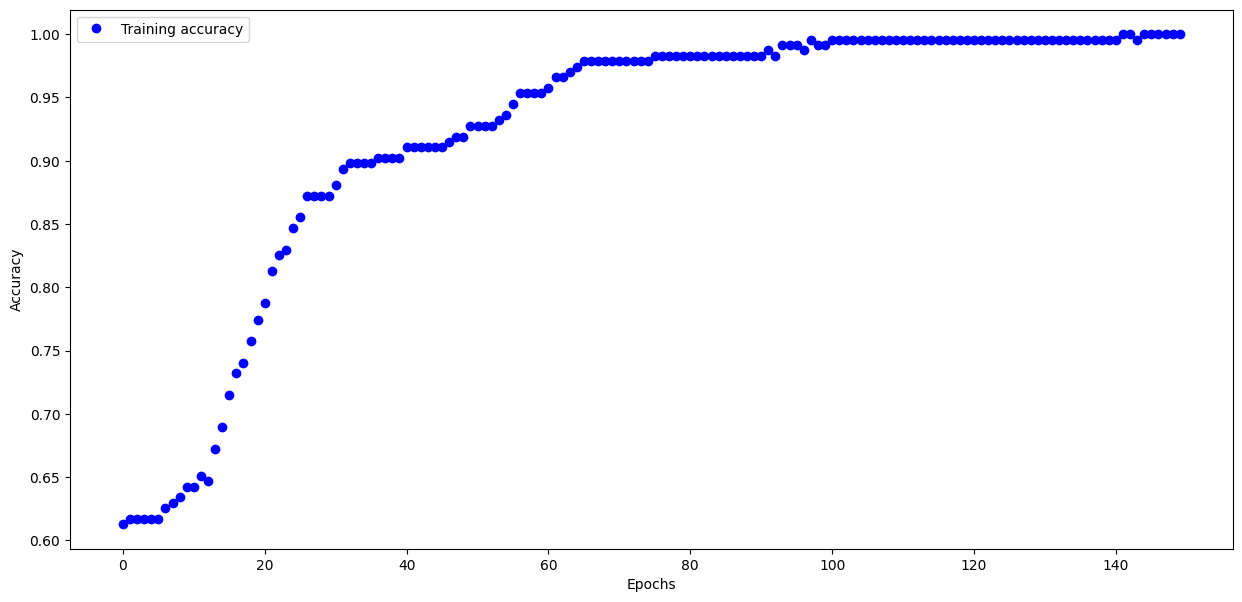

In [38]:
history_dict = history_3.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### **Important:** Document in your lab logbook the accuracy of the improved model. Do not include any code or explanations in your lab logbook. 

1. Simply record the accuracy. For example, if the obtained accuracy is 0.98, then enter "0.98" in your lab logbook.

2. Copy your MLP architecture's screenshots to Logbook.

3. 
### In addition to the accuracy and architecture, also document the output of the neural network as provided in Task 2.

<html> <h2 style="font-style:bold; color:blue;"> Try out the same model with Keras Functional models! </h2> </html>
(Advanced part)

Refer to [Keras](https://keras.io/) for more details and tutorials for the same.



### Define the layers & create the model object and input & output!

### https://keras.io/guides/functional_api/


#### The Keras Functional API is a way to create complex models, such as those with multiple outputs, models with shared layers, or acyclic graphs.


#### An example of a model with multiple inputs and multiple outputs:


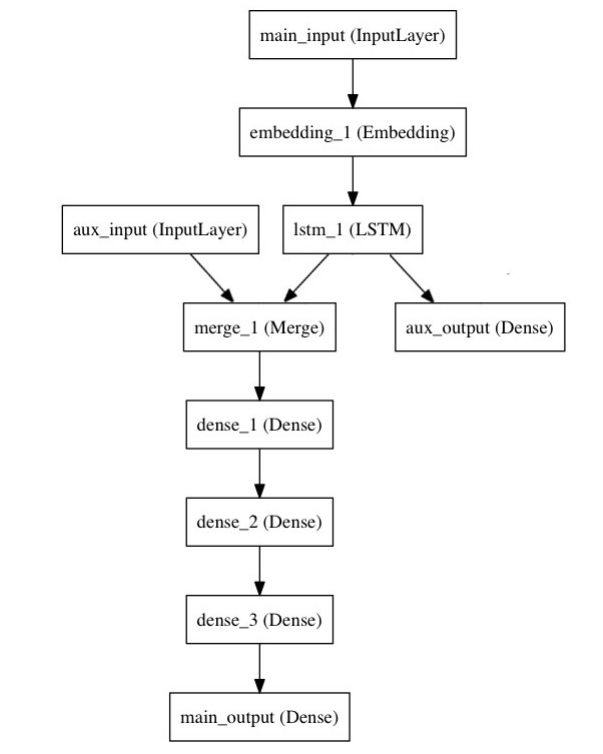

In [39]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense


In [40]:
# define the layers

x_in = Input(shape=(n_features,))

x_in

<KerasTensor shape=(None, 34), dtype=float32, sparse=False, ragged=False, name=keras_tensor_29>

In [41]:
x_1 = Dense(10, activation='relu')(x_in)
x_2 = Dense(8, activation='relu')(x_1)
x_out = Dense(1, activation='sigmoid')(x_2)

In [42]:
# define model

model_3 = Model(inputs=x_in, outputs=x_out)

In [43]:
print(model_3.summary())


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 34)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 447 (1.75 KB)

 Trainable params: 447 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [44]:
# compile the model

model_3.compile(optimizer="adam",
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


In [45]:
# fit the model

history_4 = model_3.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4043 - loss: 0.8347  
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3957 - loss: 0.7953 
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4000 - loss: 0.7654 
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4043 - loss: 0.7415 
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4128 - loss: 0.7209 
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4298 - loss: 0.7022 
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4468 - loss: 0.6855 
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4596 - loss: 0.6695 
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4809 - loss: 0.6543 
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5191 - loss: 0.6407 
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6383 - loss: 0.6274 
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - lo

In [46]:
# evaluate the model

loss, acc = model_3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.922


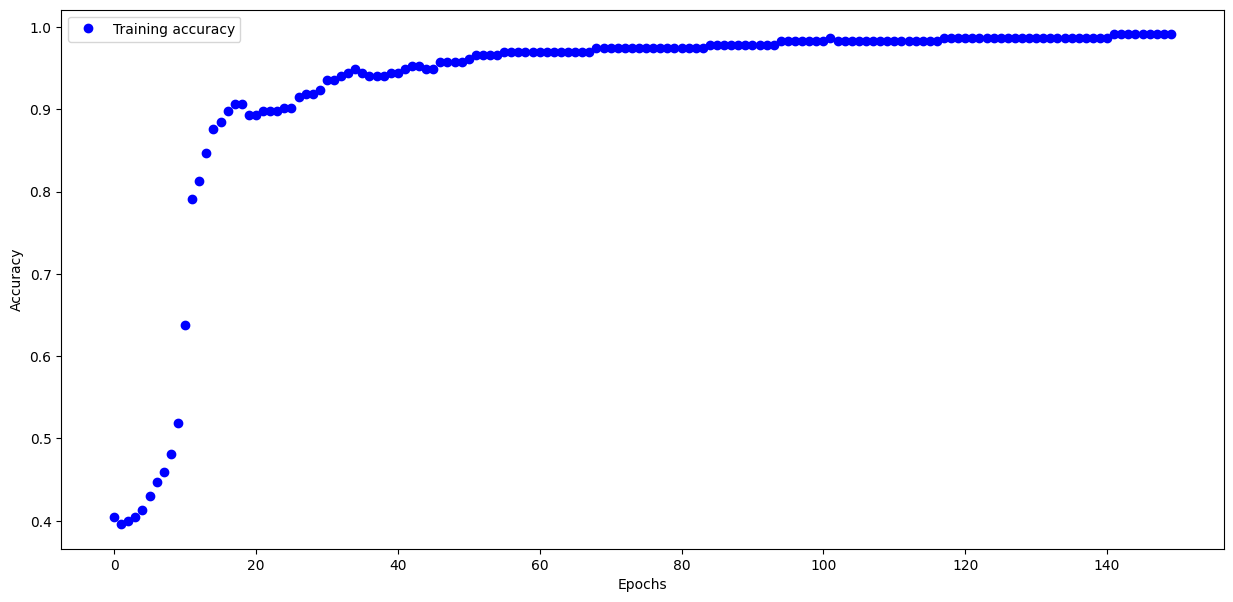

In [47]:
history_dict = history_4.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()